# LAB 4

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pyod
import sklearn.datasets
from pyod.models.ocsvm import OCSVM
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from pyod.models.deep_svdd import DeepSVDD


## Exercise 1

### 1

In [5]:
train_data: np.ndarray = None
test_data: np.ndarray = None
train_labels: np.ndarray = None
test_labels: np.ndarray = None


train_data, test_data, train_labels, test_labels= pyod.utils.data.generate_data(
    n_train = 300,
    n_test = 200,
    n_features = 3,
    contamination = 0.15
)

# print(train_data.shape)
# print(test_data.shape)
# print(train_labels.shape)
# print(test_labels.shape)

(300, 3)
(200, 3)
(300,)
(200,)


### 2

In [13]:
model = OCSVM(kernel='linear', contamination=0.15)
model.fit(train_data)


predicted_labels = model.predict(test_data)
predicted_scores = model.decision_function(test_data)

bal_acc = balanced_accuracy_score(test_labels, predicted_labels)
roc_auc = roc_auc_score(test_labels, predicted_scores)

print(bal_acc)
print(roc_auc)


0.9774509803921569
0.9990196078431373


### 3

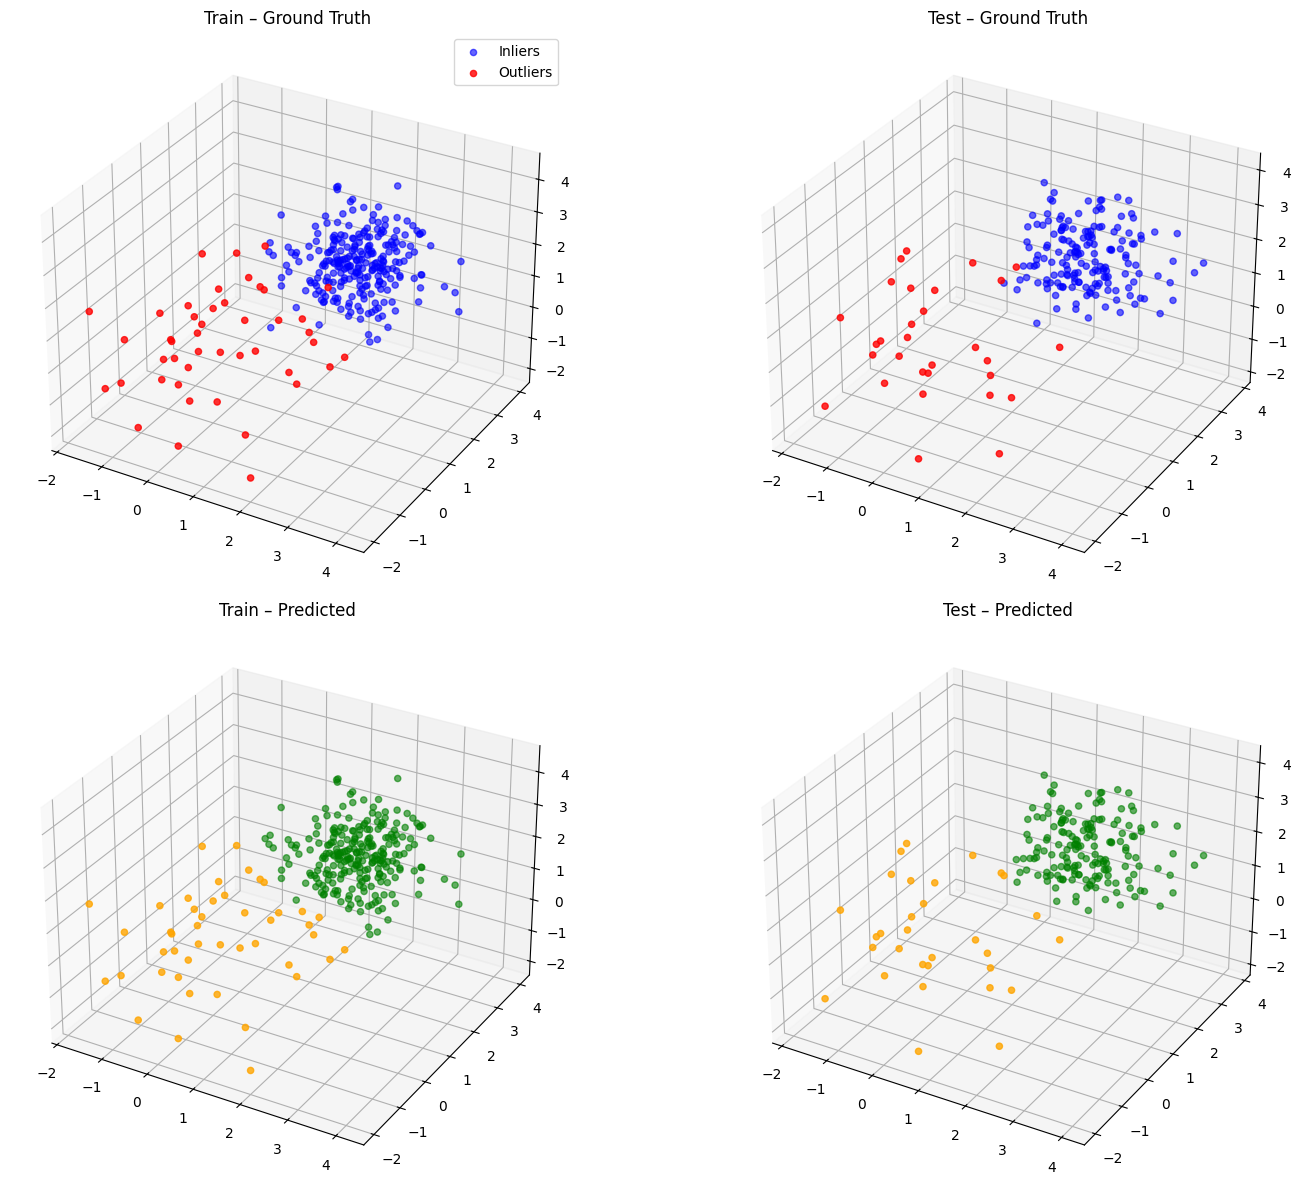

In [17]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(train_data[train_labels==0, 0],
            train_data[train_labels==0, 1],
            train_data[train_labels==0, 2],
            c='blue', alpha=0.6, label='Inliers')
ax1.scatter(train_data[train_labels==1, 0],
            train_data[train_labels==1, 1],
            train_data[train_labels==1, 2],
            c='red', alpha=0.8, label='Outliers')
ax1.set_title("Train – Ground Truth")
ax1.legend()

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(test_data[test_labels==0, 0],
            test_data[test_labels==0, 1],
            test_data[test_labels==0, 2],
            c='blue', alpha=0.6)
ax2.scatter(test_data[test_labels==1, 0],
            test_data[test_labels==1, 1],
            test_data[test_labels==1, 2],
            c='red', alpha=0.8)
ax2.set_title("Test – Ground Truth")

train_pred = model.predict(train_data)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(train_data[train_pred==0, 0],
            train_data[train_pred==0, 1],
            train_data[train_pred==0, 2],
            c='green', alpha=0.6)
ax3.scatter(train_data[train_pred==1, 0],
            train_data[train_pred==1, 1],
            train_data[train_pred==1, 2],
            c='orange', alpha=0.8)
ax3.set_title("Train – Predicted")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(test_data[predicted_labels==0, 0],
            test_data[predicted_labels==0, 1],
            test_data[predicted_labels==0, 2],
            c='green', alpha=0.6)
ax4.scatter(test_data[predicted_labels==1, 0],
            test_data[predicted_labels==1, 1],
            test_data[predicted_labels==1, 2],
            c='orange', alpha=0.8)
ax4.set_title("Test – Predicted")

plt.tight_layout()
plt.show()

### 4

In [20]:
model_rbf = OCSVM(kernel='rbf', contamination=0.15)
model_rbf.fit(train_data)

pred_labels_rbf = model_rbf.predict(test_data)
pred_scores_rbf = model_rbf.decision_function(test_data)

print("Linear", np.sum(predicted_labels == 1))
print("RBF", np.sum(pred_labels_rbf == 1))


Linear 31
RBF 34


### 5

In [29]:
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

deep_svdd = DeepSVDD(
    n_features=3,
    hidden_neurons=[64, 32],
    hidden_activation='relu',
    output_activation='sigmoid',
    optimizer='adam',
    epochs=50,
    batch_size=32,
    dropout_rate=0.1,
    l2_regularizer=0.001,
    validation_size=0.1,
    preprocessing=True,
    contamination=0.15,
    verbose=1
)

deep_svdd.fit(train_data)

pred_labels_svdd = deep_svdd.predict(test_data)
pred_scores_svdd = deep_svdd.decision_function(test_data)

bal_svdd = balanced_accuracy_score(test_labels, pred_labels_svdd)
roc_svdd = roc_auc_score(test_labels, pred_scores_svdd)

print(bal_svdd)
print(roc_svdd)


Epoch 1/50, Loss: 6.278882712125778
Epoch 2/50, Loss: 6.1540207862854
Epoch 3/50, Loss: 5.973850399255753
Epoch 4/50, Loss: 6.075540632009506
Epoch 5/50, Loss: 6.02894601225853
Epoch 6/50, Loss: 6.227845549583435
Epoch 7/50, Loss: 6.331498384475708
Epoch 8/50, Loss: 6.302237093448639
Epoch 9/50, Loss: 5.959051042795181
Epoch 10/50, Loss: 6.154719889163971
Epoch 11/50, Loss: 6.150501221418381
Epoch 12/50, Loss: 6.03334504365921
Epoch 13/50, Loss: 6.046713352203369
Epoch 14/50, Loss: 6.009464383125305
Epoch 15/50, Loss: 5.951970547437668
Epoch 16/50, Loss: 6.278357923030853
Epoch 17/50, Loss: 6.126088857650757
Epoch 18/50, Loss: 6.029499441385269
Epoch 19/50, Loss: 6.1665655970573425
Epoch 20/50, Loss: 6.191944777965546
Epoch 21/50, Loss: 6.1790356040000916
Epoch 22/50, Loss: 5.939225047826767
Epoch 23/50, Loss: 6.142974346876144
Epoch 24/50, Loss: 5.9634444415569305
Epoch 25/50, Loss: 5.990140348672867
Epoch 26/50, Loss: 6.1435315907001495
Epoch 27/50, Loss: 6.171732604503632
Epoch 28/5

In [27]:
from pyod.models.deep_svdd import DeepSVDD
import inspect
print(inspect.signature(DeepSVDD))


(n_features, c=None, use_ae=False, hidden_neurons=None, hidden_activation='relu', output_activation='sigmoid', optimizer='adam', epochs=100, batch_size=32, dropout_rate=0.2, l2_regularizer=0.1, validation_size=0.1, preprocessing=True, verbose=1, random_state=None, contamination=0.1)


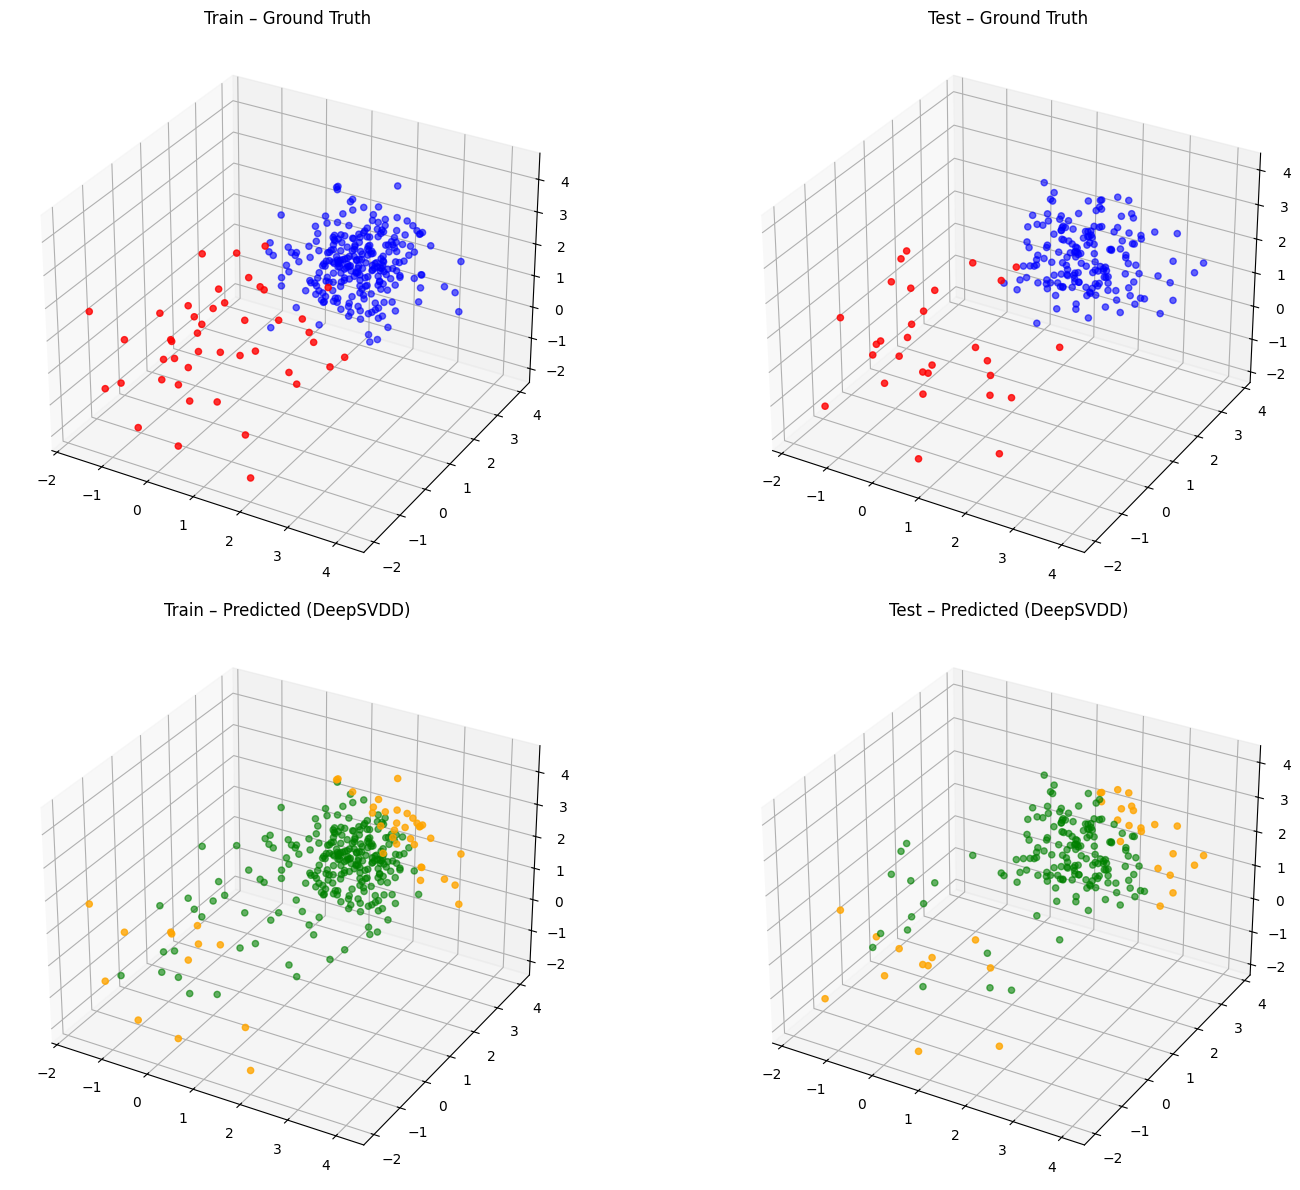

In [30]:


fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(train_data[train_labels==0, 0],
            train_data[train_labels==0, 1],
            train_data[train_labels==0, 2],
            c='blue', alpha=0.6)
ax1.scatter(train_data[train_labels==1, 0],
            train_data[train_labels==1, 1],
            train_data[train_labels==1, 2],
            c='red', alpha=0.8)
ax1.set_title("Train – Ground Truth")

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(test_data[test_labels==0, 0],
            test_data[test_labels==0, 1],
            test_data[test_labels==0, 2],
            c='blue', alpha=0.6)
ax2.scatter(test_data[test_labels==1, 0],
            test_data[test_labels==1, 1],
            test_data[test_labels==1, 2],
            c='red', alpha=0.8)
ax2.set_title("Test – Ground Truth")

train_pred_svdd = deep_svdd.predict(train_data)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(train_data[train_pred_svdd==0, 0],
            train_data[train_pred_svdd==0, 1],
            train_data[train_pred_svdd==0, 2],
            c='green', alpha=0.6)
ax3.scatter(train_data[train_pred_svdd==1, 0],
            train_data[train_pred_svdd==1, 1],
            train_data[train_pred_svdd==1, 2],
            c='orange', alpha=0.8)
ax3.set_title("Train – Predicted (DeepSVDD)")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(test_data[pred_labels_svdd==0, 0],
            test_data[pred_labels_svdd==0, 1],
            test_data[pred_labels_svdd==0, 2],
            c='green', alpha=0.6)
ax4.scatter(test_data[pred_labels_svdd==1, 0],
            test_data[pred_labels_svdd==1, 1],
            test_data[pred_labels_svdd==1, 2],
            c='orange', alpha=0.8)
ax4.set_title("Test – Predicted (DeepSVDD)")

plt.tight_layout()
plt.show()


## Exercise 2

### 1

In [32]:
import scipy.io as sio
from sklearn.model_selection import train_test_split
import numpy as np

data = sio.loadmat("cardio.mat")

X = data["X"]
y = data["y"].ravel()

y = np.where(y == 1, 0, 1)

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y,
    test_size=0.60,
    random_state=42,
    stratify=y
)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Train labels:", np.bincount(train_labels))
print("Test labels:", np.bincount(test_labels))


Train shape: (732, 21)
Test shape: (1099, 21)
Train labels: [ 70 662]
Test labels: [106 993]


### 2

In [49]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

train_labels_oc = np.where(train_labels == 0, 1, -1)

def ocsvm_auc(y_true, y_pred):
    y_pred_bin = np.where(y_pred == 1, 0, 1)
    y_true_bin = np.where(y_true == 1, 0, 1)
    return roc_auc_score(y_true_bin, y_pred_bin)

auc_scorer = make_scorer(ocsvm_auc)

cont = train_labels.mean()

param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "nu": [0.01, 0.05, cont, 0.1, 0.2],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1]
}

ocsvm = OneClassSVM()

grid = GridSearchCV(
    ocsvm,
    param_grid,
    scoring=auc_scorer,
    cv=3,
    n_jobs=-1
)

grid.fit(train_data, train_labels_oc)

print("Best parameters:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)


Best parameters: {'gamma': 0.001, 'kernel': 'poly', 'nu': 0.1}
Best CV AUC: 0.8591152664120035


### 3

In [50]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np

y_train_oc = np.where(train_labels == 0, 1, -1)
y_test_oc  = np.where(test_labels == 0, 1, -1)

bal_acc_scorer = make_scorer(balanced_accuracy_score)

cont_train = train_labels.mean()

param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "nu": [0.01, 0.05, cont_train, 0.1, 0.2],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1]
}

model = OneClassSVM()

grid = GridSearchCV(
    model,
    param_grid,
    scoring=bal_acc_scorer,
    cv=3,
    n_jobs=-1
)

grid.fit(train_data, y_train_oc)

print(grid.best_params_)
print(grid.best_score_)

best_model = grid.best_estimator_
test_pred = best_model.predict(test_data)

test_bal_acc = balanced_accuracy_score(y_test_oc, test_pred)

print(test_bal_acc)


Best parameters: {'gamma': 0.001, 'kernel': 'poly', 'nu': 0.1}
Best CV Balanced Accuracy: 0.8591152664120033
Balanced Accuracy on TEST set: 0.6029517946379372


### 4

In [76]:
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

y_train_oc = np.where(train_labels == 0, 1, -1)
y_test_oc  = np.where(test_labels == 0, 1, -1)

bal_acc_scorer = make_scorer(balanced_accuracy_score)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ocsvm", OneClassSVM())
])

cont_train = train_labels.mean()

param_grid = {
    "ocsvm__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "ocsvm__nu": [0.01, 0.05, cont_train, 0.1, 0.2],
    "ocsvm__gamma": ["scale", "auto", 0.001, 0.01, 0.1]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring=bal_acc_scorer,
    cv=3,
    n_jobs=-1
)

grid.fit(train_data, y_train_oc)

print("Best params:", grid.best_params_)
print("Best CV Balanced Acc", grid.best_score_)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(test_data)

test_bal_acc = balanced_accuracy_score(y_test_oc, y_pred_test)
print("Balanced acc on test set:", test_bal_acc)


KeyboardInterrupt: 

### 5

In [74]:
y_train_oc = 1 - 2 * train_labels
y_test_oc  = 1 - 2 * test_labels


### 6

In [54]:
print("Best params", grid.best_params_)
print("Best CV Balanced Acc", grid.best_score_)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(test_data)

test_bal_acc = balanced_accuracy_score(y_test_oc, y_pred_test)

print("Balanced Acc on test set:", test_bal_acc)


Best parameters found: {'ocsvm__gamma': 0.001, 'ocsvm__kernel': 'poly', 'ocsvm__nu': 0.2}
Best CV Balanced Accuracy: 0.7928113652798601
Balanced Accuracy on test set: 0.5933325732960916


## Exercise 3

### 1

In [73]:
data = sio.loadmat("shuttle.mat")

X = data["X"]
y = data["y"].ravel()

train_data, test_data, train_labels, test_labels = train_test_split(
    X,
    y,
    test_size=0.50,
    random_state=42,
    stratify=y
)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Train labels distr:", np.bincount(train_labels))
print("Test labels distr:", np.bincount(test_labels))

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


Train shape: (24548, 9)
Test shape: (24549, 9)
Train labels distr: [22793  1755]
Test labels distr: [22793  1756]


### 2

In [66]:
ocsvm = OCSVM(kernel='rbf', contamination=train_labels.mean())
ocsvm.fit(train_data)

ocsvm_pred = ocsvm.predict(test_data)
ocsvm_scores = ocsvm.decision_function(test_data)

print("OCSVM Balanced Acc:", balanced_accuracy_score(test_labels, ocsvm_pred))
print("OCSVM ROC AUC:", roc_auc_score(test_labels, ocsvm_scores))

deep_svdd = DeepSVDD(
    contamination=train_labels.mean(),
    n_features=train_data.shape[1],
    epochs=30,
    verbose=1
)

deep_svdd.fit(train_data)

deep_pred = deep_svdd.predict(test_data)
deep_scores = deep_svdd.decision_function(test_data)

print("DeepSVDD Balanced Acc:", balanced_accuracy_score(test_labels, deep_pred))
print("DeepSVDD ROC AUC:", roc_auc_score(test_labels, deep_scores))


OCSVM Balanced Accuracy: 0.974677190285512
OCSVM ROC AUC: 0.9913999442541555
Epoch 1/30, Loss: 711.1774263978004
Epoch 2/30, Loss: 712.58594211936
Epoch 3/30, Loss: 711.3870379328728
Epoch 4/30, Loss: 710.4384610801935
Epoch 5/30, Loss: 710.4782953709364
Epoch 6/30, Loss: 710.3713710233569
Epoch 7/30, Loss: 710.4751161038876
Epoch 8/30, Loss: 710.9000666588545
Epoch 9/30, Loss: 710.4305270314217
Epoch 10/30, Loss: 710.396582454443
Epoch 11/30, Loss: 710.3689965307713
Epoch 12/30, Loss: 711.4933539479971
Epoch 13/30, Loss: 710.3318135142326
Epoch 14/30, Loss: 710.5384286940098
Epoch 15/30, Loss: 710.415858104825
Epoch 16/30, Loss: 710.585070297122
Epoch 17/30, Loss: 710.3991471081972
Epoch 18/30, Loss: 710.6080609709024
Epoch 19/30, Loss: 710.410966694355
Epoch 20/30, Loss: 710.4721491187811
Epoch 21/30, Loss: 710.4096302241087
Epoch 22/30, Loss: 710.4310993403196
Epoch 23/30, Loss: 710.665578469634
Epoch 24/30, Loss: 711.8559970408678
Epoch 25/30, Loss: 710.5222505480051
Epoch 26/30, L

### 3

In [71]:

from sklearn.metrics import balanced_accuracy_score, roc_auc_score

d = train_data.shape[1]

def evaluate(name, hidden, use_ae=False):
    print(f"\n=== Architecture: {name} ===")
    print(f"hidden_neurons={hidden}, use_ae={use_ae}")

    model = DeepSVDD(
        n_features=d,
        hidden_neurons=hidden,
        use_ae=use_ae,
        epochs=30,
        batch_size=32,
        contamination=train_labels.mean(),
        verbose=0
    )

    model.fit(train_data)

    pred = model.predict(test_data)
    scores = model.decision_function(test_data)

    ba = balanced_accuracy_score(test_labels, pred)
    auc = roc_auc_score(test_labels, scores)

    print(f"Balanced Accuracy: {ba:.4f}")
    print(f"ROC AUC:          {auc:.4f}")


evaluate("1", [8, 4])

evaluate("2", [d, 3])

evaluate("3", [d, 6, 3, 6, d], use_ae=True)



=== Architecture: Shallow [8,4] ===
hidden_neurons=[8, 4], use_ae=False
Epoch 1/30, Loss: 32.83421015413478
Epoch 2/30, Loss: 32.8337768772617
Epoch 3/30, Loss: 32.836990491021425
Epoch 4/30, Loss: 32.83722235541791
Epoch 5/30, Loss: 32.83721319679171
Epoch 6/30, Loss: 32.83610683400184
Epoch 7/30, Loss: 32.83676094375551
Epoch 8/30, Loss: 32.83535350114107
Epoch 9/30, Loss: 32.82953783264384
Epoch 10/30, Loss: 32.834075906313956
Epoch 11/30, Loss: 32.8320483090356
Epoch 12/30, Loss: 32.83424535021186
Epoch 13/30, Loss: 32.843404019251466
Epoch 14/30, Loss: 32.833526325412095
Epoch 15/30, Loss: 32.83244390459731
Epoch 16/30, Loss: 32.83256666595116
Epoch 17/30, Loss: 32.838648916687816
Epoch 18/30, Loss: 32.833839708939195
Epoch 19/30, Loss: 32.836024769581854
Epoch 20/30, Loss: 32.83619030704722
Epoch 21/30, Loss: 32.83212684746832
Epoch 22/30, Loss: 32.83015162916854
Epoch 23/30, Loss: 32.847924712114036
Epoch 24/30, Loss: 32.838652102742344
Epoch 25/30, Loss: 32.838597517460585
Epo